In [100]:
import cv2
import numpy as np

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image

In [103]:
image_gen= ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,shear_range=0.2,zoom_range=0.2,fill_mode='nearest')

In [105]:
image_gen.flow_from_directory('C:\\Users\\Isna Khan\\project isna final AI\\pictures\\train')

Found 14002 images belonging to 2 classes.


In [107]:
from keras.models import Sequential

In [108]:
from keras.layers import Activation,Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [76]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



In [109]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)            

In [110]:
train_image_gen = image_gen.flow_from_directory('C:\\Users\\Isna Khan\\project isna final AI\\pictures\\train',
                             target_size=(128,128),
                             batch_size=16,
                             class_mode='binary')

Found 14002 images belonging to 2 classes.


In [112]:
test_image_gen = image_gen.flow_from_directory('C:\\Users\\Isna Khan\\project isna final AI\\pictures\\test',
                             target_size=(128,128),
                             batch_size=16,
                             class_mode='binary')

Found 5136 images belonging to 2 classes.


In [113]:
train_image_gen.class_indices

{'empty pallet': 0, 'occupied pallet': 1}

In [114]:
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=100,
                              validation_data =test_image_gen,validation_steps=12)

Epoch 1/1
100/100 [==============================] - 79s 790ms/step - loss: 0.6183 - accuracy: 0.6500 - val_loss: 0.5918 - val_accuracy: 0.6771


In [115]:
results.history['accuracy']

[0.65]

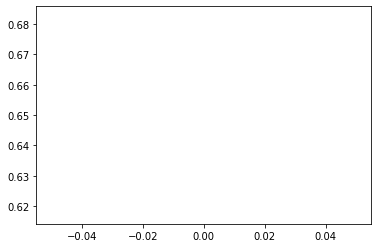

In [116]:
plt.plot(results.history['accuracy'])

In [117]:
model.save('empty_occupied.h5')

In [119]:
from keras.models import load_model

In [120]:
new_model = load_model('empty_occupied.h5')

In [121]:
from PIL import Image
pallet_file = Image.open('C:\\Users\\Isna Khan\\project isna final AI\\pictures\\test\\occupied\\occupied (37).jpg')


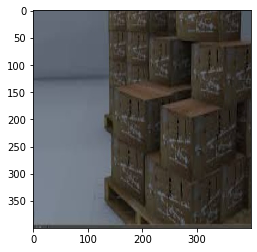

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(pallet_file)


In [39]:
import anvil.server
anvil.server.connect("63HRRXNPYJC3H6UEHR4PW6I2-MFIFBLU4YPOCQ35B")


Connecting to wss://anvil.works/uplink
Anvil websocket open
Reconnecting Anvil Uplink...
Authenticated OK


In [43]:
import anvil.media

@anvil.server.callable
def classify_image(pallet_img):
    with anvil.media.TempFile(pallet_img) as filename:
        img = image.load_img(filename)

In [46]:
import PIL 

In [54]:
import anvil.media

@anvil.server.callable
def classify_image(img):
    with anvil.media.TempFile(img) as filename:
                                               img = image.load_img(img)
        
                                               img = img.resize((128, 128,3), resample= PIL.Image.BICUBIC)
                                               arr = img_to_array(img)
                                               arr = np.expand_dims(arr, axis=0)
                                               arr /= 255.0
                                               score = model.predict(arr)
    return ('occupied' if score < 0.5 else 'empty', float(score))